SVR: MAE: 24.1243 | MSE: 968.1104 | R2: 0.4972 | cl/cd: 78.3875 (4, index 327)
Linear Regression: MAE: 24.2430 | MSE: 932.6523 | R2: 0.5156 | cl/cd: 92.4287 (4, index 327)
Lasso: MAE: 24.2401 | MSE: 932.9856 | R2: 0.5154 | cl/cd: 91.9442 (4, index 327)
Ridge: MAE: 24.2430 | MSE: 932.6538 | R2: 0.5156 | cl/cd: 92.4269 (4, index 327)
ElasticNet: MAE: 24.3272 | MSE: 937.8510 | R2: 0.5129 | cl/cd: 88.7672 (4, index 327)
BayesianRidge: MAE: 24.2440 | MSE: 932.6999 | R2: 0.5156 | cl/cd: 92.3747 (4, index 327)
The best model is Linear Regression with R2 score 0.5156
                     cl/cd Airfoil        MAE         MSE        R2
SVR                78.3875       4  24.124301  968.110363  0.497166
Linear Regression  92.4287       4  24.242959  932.652293  0.515583
Lasso              91.9442       4  24.240079  932.985604  0.515409
Ridge              92.4269       4  24.242992  932.653821  0.515582
ElasticNet         88.7672       4  24.327221  937.850969  0.512882
BayesianRidge      92.3747

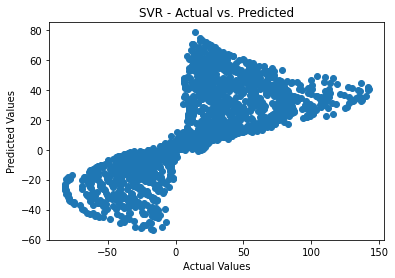

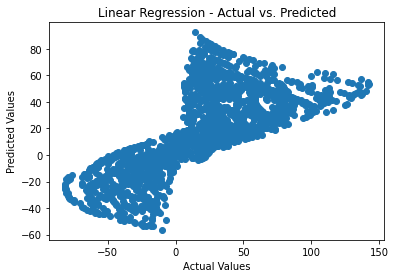

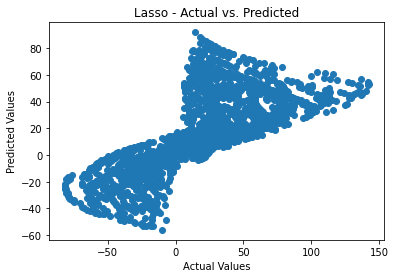

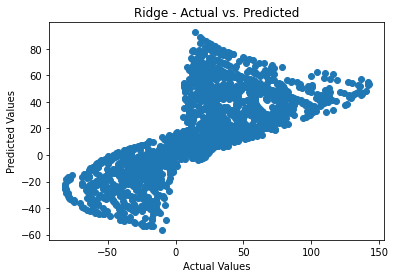

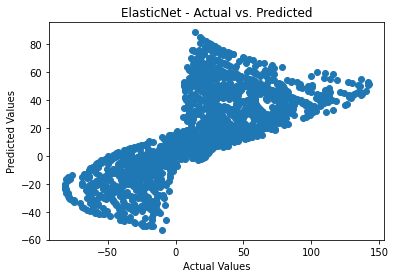

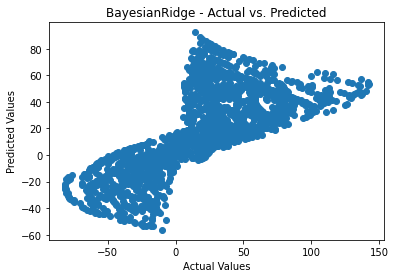

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv(r'airfoil.csv')

# Define features and target column
features_cols = ['Alpha', 'Reynolds', 'Airfoil']
target_col = 'Cl/Cd'

# Encode categorical feature
labelencoder = LabelEncoder()
df['Airfoil'] = labelencoder.fit_transform(df['Airfoil'])

X = df[features_cols].values
y = df[target_col].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'SVR': SVR(**{'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}),
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'BayesianRidge': BayesianRidge(),
    
}

# Define performance metrics
metrics = {
    'MAE': mean_absolute_error,
    'MSE': mean_squared_error,
    'R2': r2_score
}

best_model = None
best_model_score = -np.inf

results = pd.DataFrame(columns=['cl/cd', 'Airfoil'] + list(metrics.keys()), index=models.keys())

# Iterate over the models and calculate the metrics
for name, model in models.items():
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate the metrics
    metrics_values = []
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        results.loc[name, metric_name] = metric_value
        metrics_values.append(f'{metric_name}: {metric_value:.4f}')

    # Find the highest predicted 'cl/cd' value and its corresponding airfoil name
    max_cl_cd_index = y_pred.argmax()
    max_cl_cd = y_pred[max_cl_cd_index]
    results.loc[name, 'cl/cd'] = f'{max_cl_cd:.4f}'
    results.loc[name, 'Airfoil'] = df.loc[max_cl_cd_index, 'Airfoil']

    # Update the best model if necessary
    if metrics['R2'](y_test, y_pred) > best_model_score:
        best_model = name
        best_model_score = metrics['R2'](y_test, y_pred)

    # Print the results for this model
    print(f'{name}: {" | ".join(metrics_values)} | cl/cd: {max_cl_cd:.4f} ({df.loc[max_cl_cd_index, "Airfoil"]}, index {max_cl_cd_index})')

# Print the R2 score of the best model
print(f'The best model is {best_model} with R2 score {best_model_score:.4f}')

# Print the overall results
print(results)

# Find the maximum predicted Cl/Cd ratio and the
import matplotlib.pyplot as plt

# Iterate over the models and create scatter plots
for name, model in models.items():
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Create scatter plot of actual vs. predicted values
    plt.scatter(y_test, y_pred)
    plt.title(f'{name} - Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


Best hyperparameters: {'C': 10, 'epsilon': 0.3, 'kernel': 'rbf'}


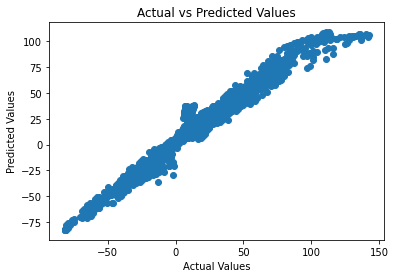

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv(r'airfoil.csv')

# Define features and target column
features_cols = ['Alpha', 'Reynolds', 'Airfoil']
target_col = 'Cl/Cd'

# Encode categorical feature
labelencoder = LabelEncoder()
df['Airfoil'] = labelencoder.fit_transform(df['Airfoil'])

# Split data into training and test sets
X = df[features_cols].values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Subset selection (optional)
# X_train = X_train[:, :2]
# X_test = X_test[:, :2]

# Define SVR model
svr = SVR()

# Define hyperparameters grid search
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'poly', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train SVR model with best hyperparameters
best_svr = SVR(**grid_search.best_params_)
best_svr.fit(X_train, y_train)

# Predict on test set
y_pred = best_svr.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Load data
data = pd.read_csv('airfoil.csv')

# Split data into input and output columns
X = data.iloc[:, :2].values
y = data.iloc[:, 2:].values

# Encode airfoil names as numbers
labelencoder = LabelEncoder()
y[:, 0] = labelencoder.fit_transform(y[:, 0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale input data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear regression R^2:', r2_score(y_test, y_pred_lr))

# Train random forest regressor model
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print('Random forest R^2:', r2_score(y_test, y_pred_rfr))

# Train support vector regressor model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train[:, 1].ravel())
y_pred_svr = svr.predict(X_test)
print('SVR R^2:', r2_score(y_test[:, 1], y_pred_svr))

# Train multi-layer perceptron regressor model
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=0)
mlp.fit(X_train, y_train[:, 1].ravel())
y_pred_mlp = mlp.predict(X_test)
print('MLP R^2:', r2_score(y_test[:, 1], y_pred_mlp))

# Predict airfoil and cl/cd ratio based on input values
def predict(alpha, reynolds):
    input_data = np.array([[alpha, reynolds]])
    input_data_scaled = sc.transform(input_data)
    airfoil_name_lr, cl_cd_ratio_lr = lr.predict(input_data_scaled)[0]
    airfoil_name_lr = labelencoder.inverse_transform(np.array([int(airfoil_name_lr)]))[0]
    airfoil_name_rfr, cl_cd_ratio_rfr = rfr.predict(input_data_scaled)[0]
    airfoil_name_rfr = labelencoder.inverse_transform(np.array([int(airfoil_name_rfr)]))[0]
    cl_cd_ratio_svr = svr.predict(input_data_scaled)[0]
    cl_cd_ratio_mlp = mlp.predict(input_data_scaled)[0]
 
    return {
        'Linear regression': [airfoil_name_lr, cl_cd_ratio_lr],
        'Random forest': [airfoil_name_rfr, cl_cd_ratio_rfr],
        'Support vector regression': [airfoil_name_rfr, cl_cd_ratio_svr],
        'Multi-layer perceptron': [airfoil_name_rfr, cl_cd_ratio_mlp]
    }

alpha=input('Enter Alpha number =')
reynold=input('Enter Reynold Number=')
prediction = predict(alpha, reynold)
print('Predicted airfoil and cl/cd ratio for alpha =', alpha, 'and Reynolds =', reynold)
for model, values in prediction.items():
    print(model + ':', values[0], values[1])

Linear regression R^2: 0.22641401637235392
Random forest R^2: 0.320684612628534
SVR R^2: 0.8524650398114656
MLP R^2: 0.8698165367814397
Predicted airfoil and cl/cd ratio for alpha = 10 and Reynolds = 500000
Linear regression: naca2412 45.04509453846985
Random forest: naca2412 67.41014552526367
Support vector regression: naca2412 64.84893582412442
Multi-layer perceptron: naca2412 65.20040628543971


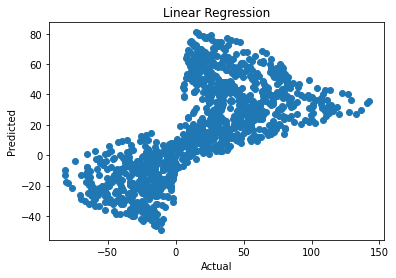

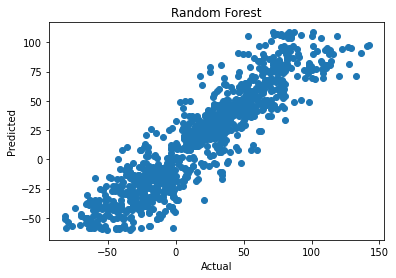

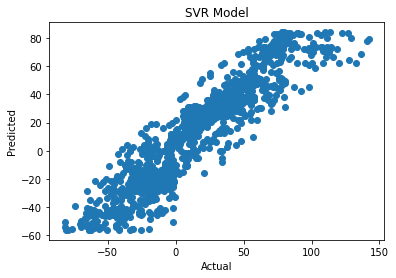

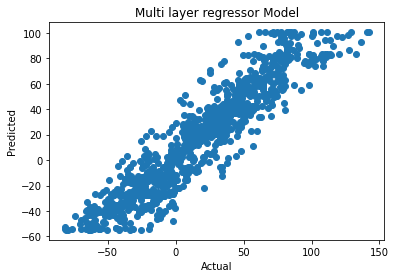

In [4]:
import matplotlib.pyplot as plt

# Plot scatter plot for linear regression
plt.scatter(y_test[:, 1], y_pred_lr[:, 1])
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot scatter plot for random forest
plt.scatter(y_test[:, 1], y_pred_rfr[:, 1])
plt.title('Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot scatter plot for decision tree
plt.scatter(y_test[:, 1], y_pred_svr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Model')
plt.show()

plt.scatter(y_test[:, 1],y_pred_mlp)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multi layer regressor Model')
plt.show()